# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [5]:
df = pd.read_csv("BTCUSDT_price_data_2024-01-24-2.csv")
df["timestamp"] = df["timestamp"].astype(str).str.replace(r"[^0-9]", "", regex=True)
df["timestamp"] = df["timestamp"].astype(float) / 1000
df["datetime"] = pd.to_datetime(df["timestamp"], unit="s")
df = df.set_index("datetime")
df.head()

,timestamp,mid_price,volume
datetime,,,
2024-01-24 00:00:00,1.706054e+09,39881.95,439.561
2024-01-24 00:01:00,1.706054e+09,39926.55,776.492
2024-01-24 00:02:00,1.706055e+09,39877.05,339.306
2024-01-24 00:03:00,1.706055e+09,39927.45,246.511
2024-01-24 00:04:00,1.706055e+09,39926.55,423.920


## Task 1

In [6]:
df["p_t_minus_1"] = df["mid_price"].shift(1)
df["asset_return"] = ((df["mid_price"] - df["p_t_minus_1"]) / df["p_t_minus_1"]).fillna(0.0)

## Task 2

In [7]:
window = 10
df["sma_10"] = df["mid_price"].rolling(window=window).mean()

## Task 3

In [8]:
df["signal"] = 0
df.loc[df["mid_price"] > df["sma_10"], "signal"] = 1
df.loc[df["mid_price"] < df["sma_10"], "signal"] = -1

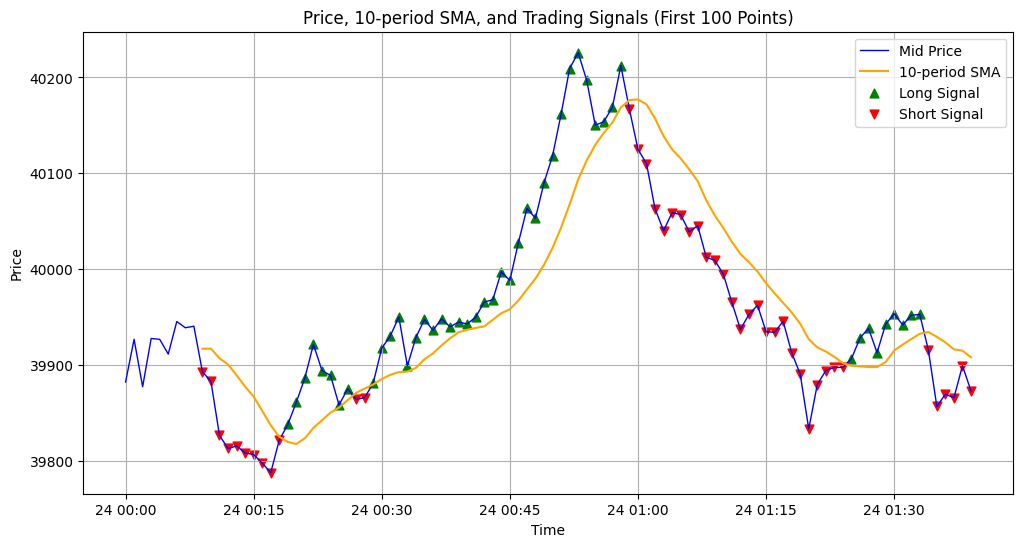

In [9]:
# --- Plot: Price, SMA, and Trading Signals (first 100 points) ---

subset = df.iloc[:100]

plt.figure(figsize=(12, 6))

plt.plot(subset.index, subset["mid_price"], label="Mid Price", color="blue", linewidth=1)
plt.plot(subset.index, subset["sma_10"], label="10-period SMA", color="orange", linewidth=1.5)

# Mark long and short signals
long_signals = subset[subset["signal"] == 1]
short_signals = subset[subset["signal"] == -1]

plt.scatter(long_signals.index, long_signals["mid_price"], label="Long Signal", color="green", marker="^", s=40)
plt.scatter(short_signals.index, short_signals["mid_price"], label="Short Signal", color="red", marker="v", s=40)

plt.title("Price, 10-period SMA, and Trading Signals (First 100 Points)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

## Task 4 - 5

In [10]:
from simulate import backtest_strategy
from utils import plot_strategy_overview

In [11]:
transaction_cost_pct = 0.0
allow_short_enter = True
results = backtest_strategy(df,allow_short_enter=allow_short_enter, transaction_cost_pct=transaction_cost_pct)

Simulation
Initial capital: $100,000.00
Allow short enter: True
Transaction cost per side: 0.0000%
Results
------
Final equity: $102,585.49
Total return: 2.59%
Max drawdown: -2.06%
Number of trades: 225
Sharpe ratio: 21.026622685863547


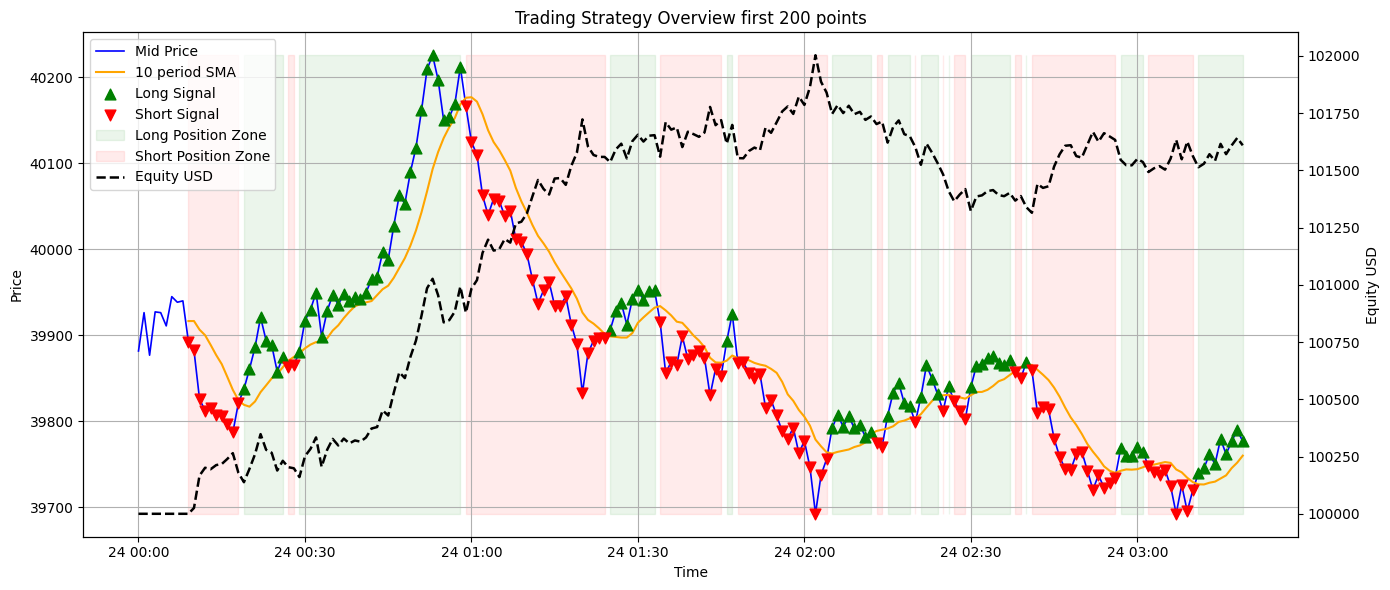

(<Figure size 1400x600 with 2 Axes>,
 <Axes: title={'center': 'Trading Strategy Overview first 200 points'}, xlabel='Time', ylabel='Price'>,
 <Axes: ylabel='Equity USD'>)

In [12]:
plot_strategy_overview(results, n_points=200)

# Task 6

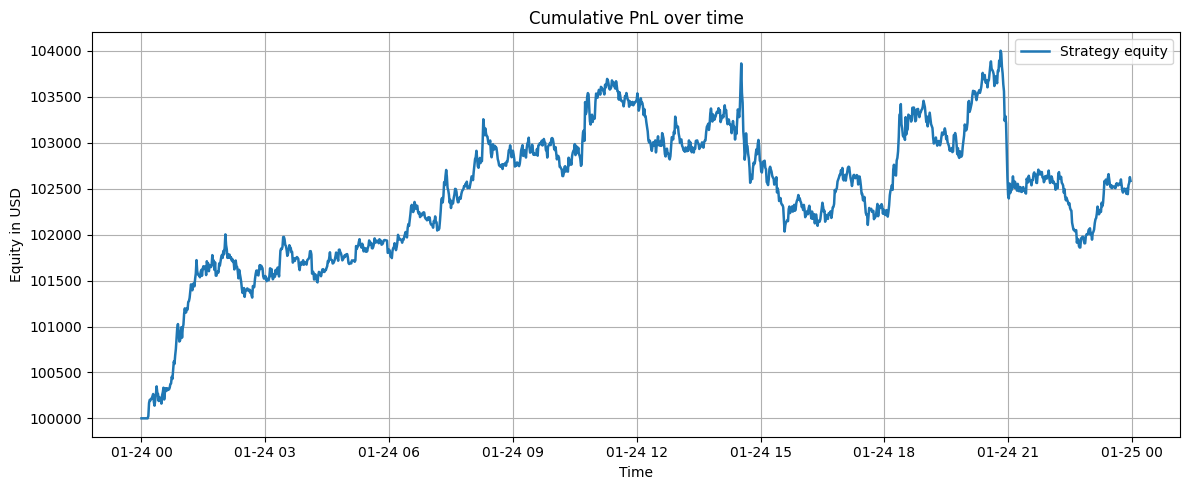

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df.index, results["equity"], label="Strategy equity", linewidth=1.8)
ax.set_title("Cumulative PnL over time")
ax.set_xlabel("Time")
ax.set_ylabel("Equity in USD")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

## Task 7

In [14]:
from utils import plot_strategy_overview_multi

In [15]:
transaction_cost_pct = 0.0002  # 0.02% per side
results_with_transaction_cost = backtest_strategy(df, allow_short_enter=True, transaction_cost_pct=transaction_cost_pct)

Simulation
Initial capital: $100,000.00
Allow short enter: True
Transaction cost per side: 0.0200%
Results
------
Final equity: $93,767.39
Total return: -6.23%
Max drawdown: -8.15%
Number of trades: 225
Sharpe ratio: -46.02985840495116


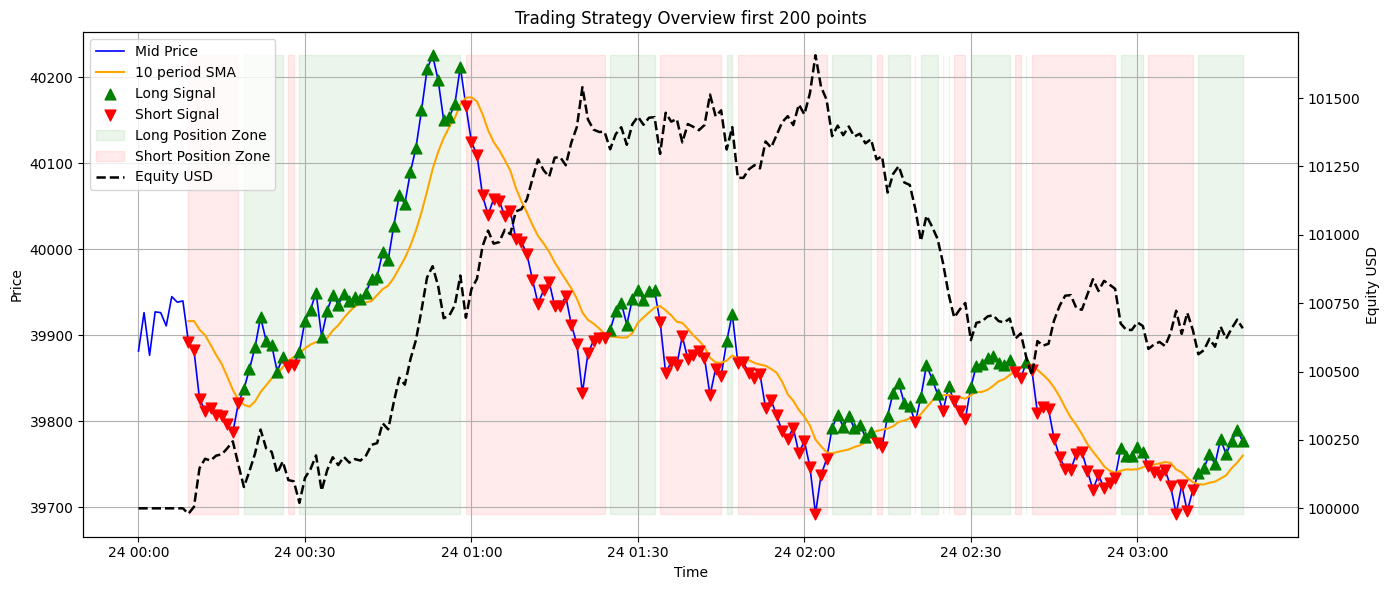

(<Figure size 1400x600 with 2 Axes>,
 <Axes: title={'center': 'Trading Strategy Overview first 200 points'}, xlabel='Time', ylabel='Price'>,
 <Axes: ylabel='Equity USD'>)

In [16]:
plot_strategy_overview(results_with_transaction_cost, n_points=200)

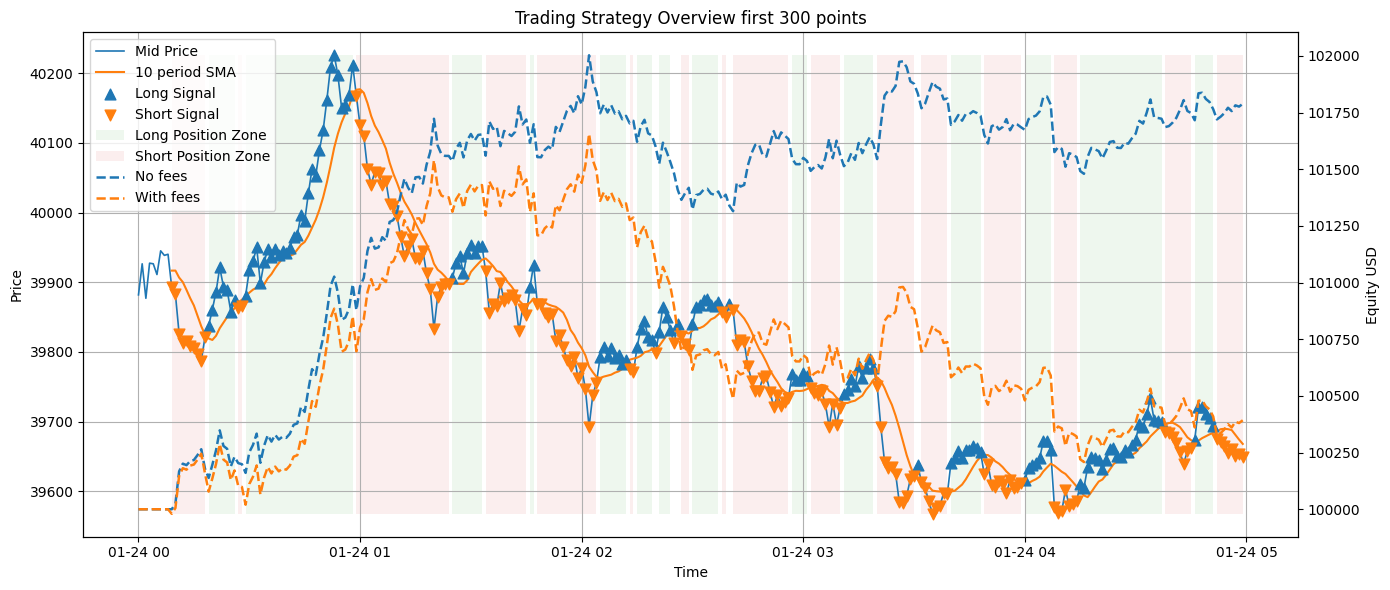

(<Figure size 1400x600 with 2 Axes>,
 <Axes: title={'center': 'Trading Strategy Overview first 300 points'}, xlabel='Time', ylabel='Price'>,
 <Axes: ylabel='Equity USD'>)

In [17]:
plot_strategy_overview_multi(
    results,
    equities={
        "No fees": results["equity"],
        "With fees": results_with_transaction_cost["equity"]
    },
    n_points=300
)

## Task 8

In [40]:
df = pd.read_csv("BTCUSDT_price_data_2024-01-24-2.csv")
df["timestamp"] = df["timestamp"].astype(str).str.replace(r"[^0-9]", "", regex=True)
df["timestamp"] = df["timestamp"].astype(float) / 1000
df["datetime"] = pd.to_datetime(df["timestamp"], unit="s")
df = df.set_index("datetime")
df.head()

,timestamp,mid_price,volume
datetime,,,
2024-01-24 00:00:00,1.706054e+09,39881.95,439.561
2024-01-24 00:01:00,1.706054e+09,39926.55,776.492
2024-01-24 00:02:00,1.706055e+09,39877.05,339.306
2024-01-24 00:03:00,1.706055e+09,39927.45,246.511
2024-01-24 00:04:00,1.706055e+09,39926.55,423.920


In [41]:
def compute_sma_signal(df, window):
    df["sma"] = df["mid_price"].rolling(window=window).mean()
    df["signal"] = 0
    df.loc[df["mid_price"] > df["sma"], "signal"] = 1
    df.loc[df["mid_price"] < df["sma"], "signal"] = -1
    return df

In [45]:
df = compute_sma_signal(df, window=50)

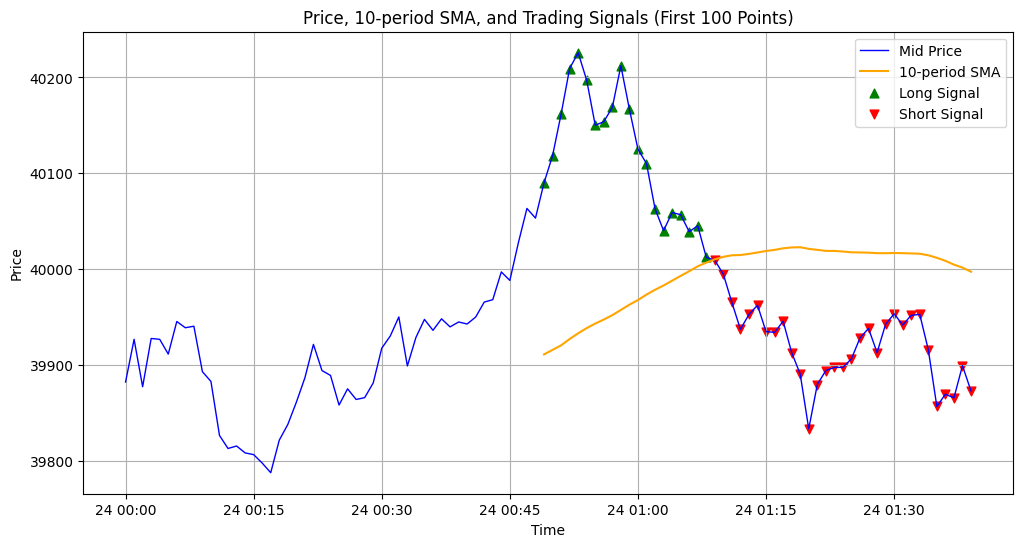

In [46]:
# --- Plot: Price, SMA, and Trading Signals (first 100 points) ---

subset = df.iloc[:100]

plt.figure(figsize=(12, 6))

plt.plot(subset.index, subset["mid_price"], label="Mid Price", color="blue", linewidth=1)
plt.plot(subset.index, subset["sma"], label="10-period SMA", color="orange", linewidth=1.5)

# Mark long and short signals
long_signals = subset[subset["signal"] == 1]
short_signals = subset[subset["signal"] == -1]

plt.scatter(long_signals.index, long_signals["mid_price"], label="Long Signal", color="green", marker="^", s=40)
plt.scatter(short_signals.index, short_signals["mid_price"], label="Short Signal", color="red", marker="v", s=40)

plt.title("Price, 10-period SMA, and Trading Signals (First 100 Points)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# End

In [33]:
df.head()

,timestamp,mid_price,volume,p_t_minus_1,r_t,sma_10,signal,signal_shifted,r_t_strategy
datetime,,,,,,,,,
2024-01-24 00:00:00,1.706054e+09,39881.95,439.561,NaN,NaN,NaN,0,NaN,NaN
2024-01-24 00:01:00,1.706054e+09,39926.55,776.492,39881.95,0.001118,NaN,0,0.0,0.0
2024-01-24 00:02:00,1.706055e+09,39877.05,339.306,39926.55,-0.001240,NaN,0,0.0,-0.0
2024-01-24 00:03:00,1.706055e+09,39927.45,246.511,39877.05,0.001264,NaN,0,0.0,0.0
2024-01-24 00:04:00,1.706055e+09,39926.55,423.920,39927.45,-0.000023,NaN,0,0.0,-0.0
